# Part 2.3 | Bivariate Relationships by Category

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams.update({
    'font.family': 'serif',
    'font.serif': ['Times New Roman'],
    'font.size': 16,
    'axes.titlesize': 20,
    'axes.labelsize': 16,
    'font.style': 'italic',
    'figure.dpi': 400
})

## Load Data

In [2]:
# Dataset 1: Income by County
income = pd.read_csv('data/Income_By_County.csv', index_col=0)
income = income[['county_fips', 'Median Household Income']].dropna()
income['county_fips'] = income['county_fips'].astype(int).astype(str)
income.columns = ['county_fips', 'income']
print(f"Income data: {len(income)} counties")

# Dataset 2: Elections by County (wide format - dem share)
elections = pd.read_csv('data/Democratic_Share_Presidential_Wide.csv', index_col=0)
elections['county_fips'] = elections['county_fips'].astype(str)
print(f"Elections data: {len(elections)} counties")

# Dataset 3: Raw election data (for total votes)
raw = pd.read_csv('data/County-Presidential-Election-Returns-2000-2024.csv', index_col=0)
raw = raw.dropna(subset=['county_fips'])
raw['county_fips'] = raw['county_fips'].astype(int).astype(str)
total_votes = raw[raw.index == 2024][['county_fips', 'totalvotes']].drop_duplicates()
total_votes.columns = ['county_fips', 'total_votes_2024']
print(f"Total votes data: {len(total_votes)} counties")

Income data: 3195 counties
Elections data: 3200 counties
Total votes data: 3203 counties


In [ ]:
# Preview elections data
elections.head()

In [3]:
# Merge all datasets
data = pd.merge(income, elections, on='county_fips')
data = pd.merge(data, total_votes, on='county_fips')
print(f"Merged data: {len(data)} counties")

# Add transformations
data['log_income'] = np.log(data['income'])
data['log_votes'] = np.log(data['total_votes_2024'])

# Convert to long format for year comparisons
data_long = data.melt(id_vars=['county_fips', 'income', 'log_income', 'total_votes_2024', 'log_votes'],
                      value_vars=['2000', '2024'],
                      var_name='Year', value_name='dem_share')
data_long = data_long.dropna()

print(f"Long format: {len(data_long)} observations")

Merged data: 3106 counties
Long format: 6209 observations


## Figure 1: Democratic Share by Year (Q1)

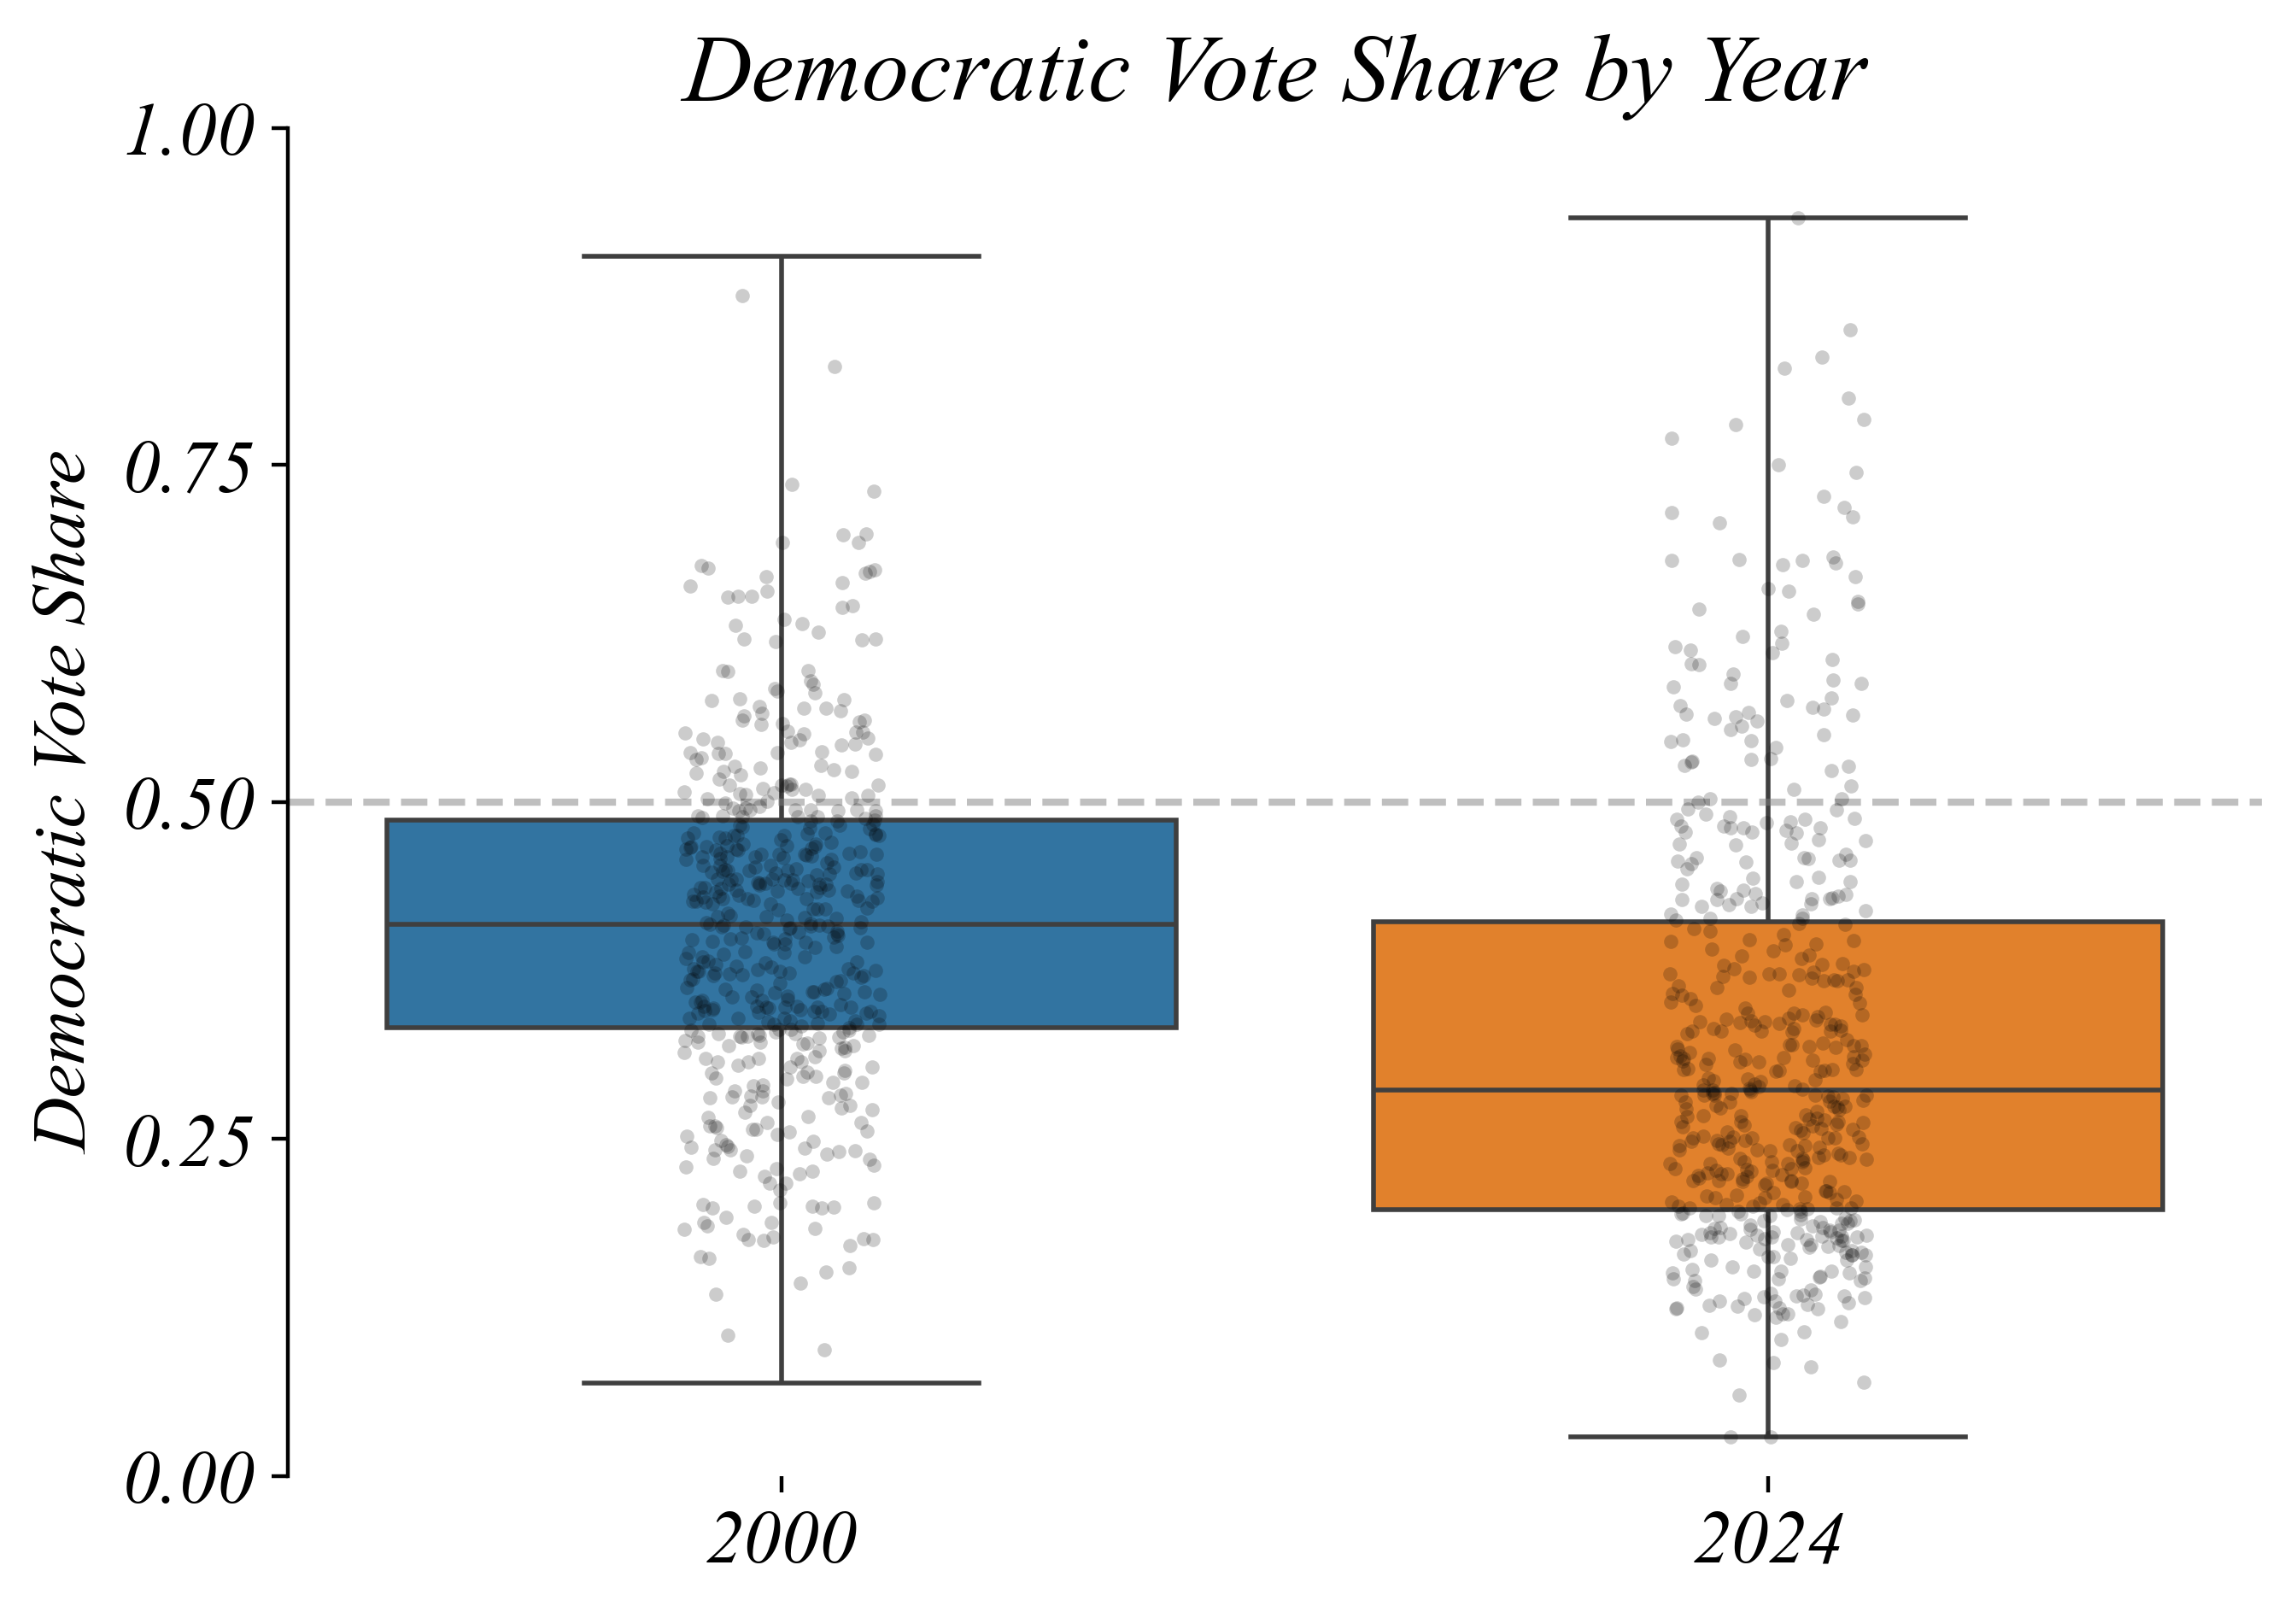

In [10]:
# Figure 1: Boxplot of dem share by year (2000 vs 2024)
fig, ax = plt.subplots(figsize=(7, 5))

sns.boxplot(data=data_long, x='Year', y='dem_share', 
            order=['2000', '2024'],
            hue='Year', hue_order=['2000', '2024'],
            palette=['C0', 'C1'], whis=(0, 100), ax=ax, legend=False)

sns.stripplot(data=data_long.sample(1000), x='Year', y='dem_share',
              order=['2000', '2024'],
              color='black', alpha=0.2, size=3, ax=ax)

ax.set_xlabel('')
ax.set_ylabel('Democratic Vote Share')
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
ax.axhline(0.5, color='grey', linestyle='--', alpha=0.5)

ax.set_title('Democratic Vote Share by Year')

sns.despine(bottom=True)

plt.tight_layout()
plt.savefig('i/dem_share_by_year.png')
plt.show()

## Figure 2: County Size vs Democratic Share (Q2)

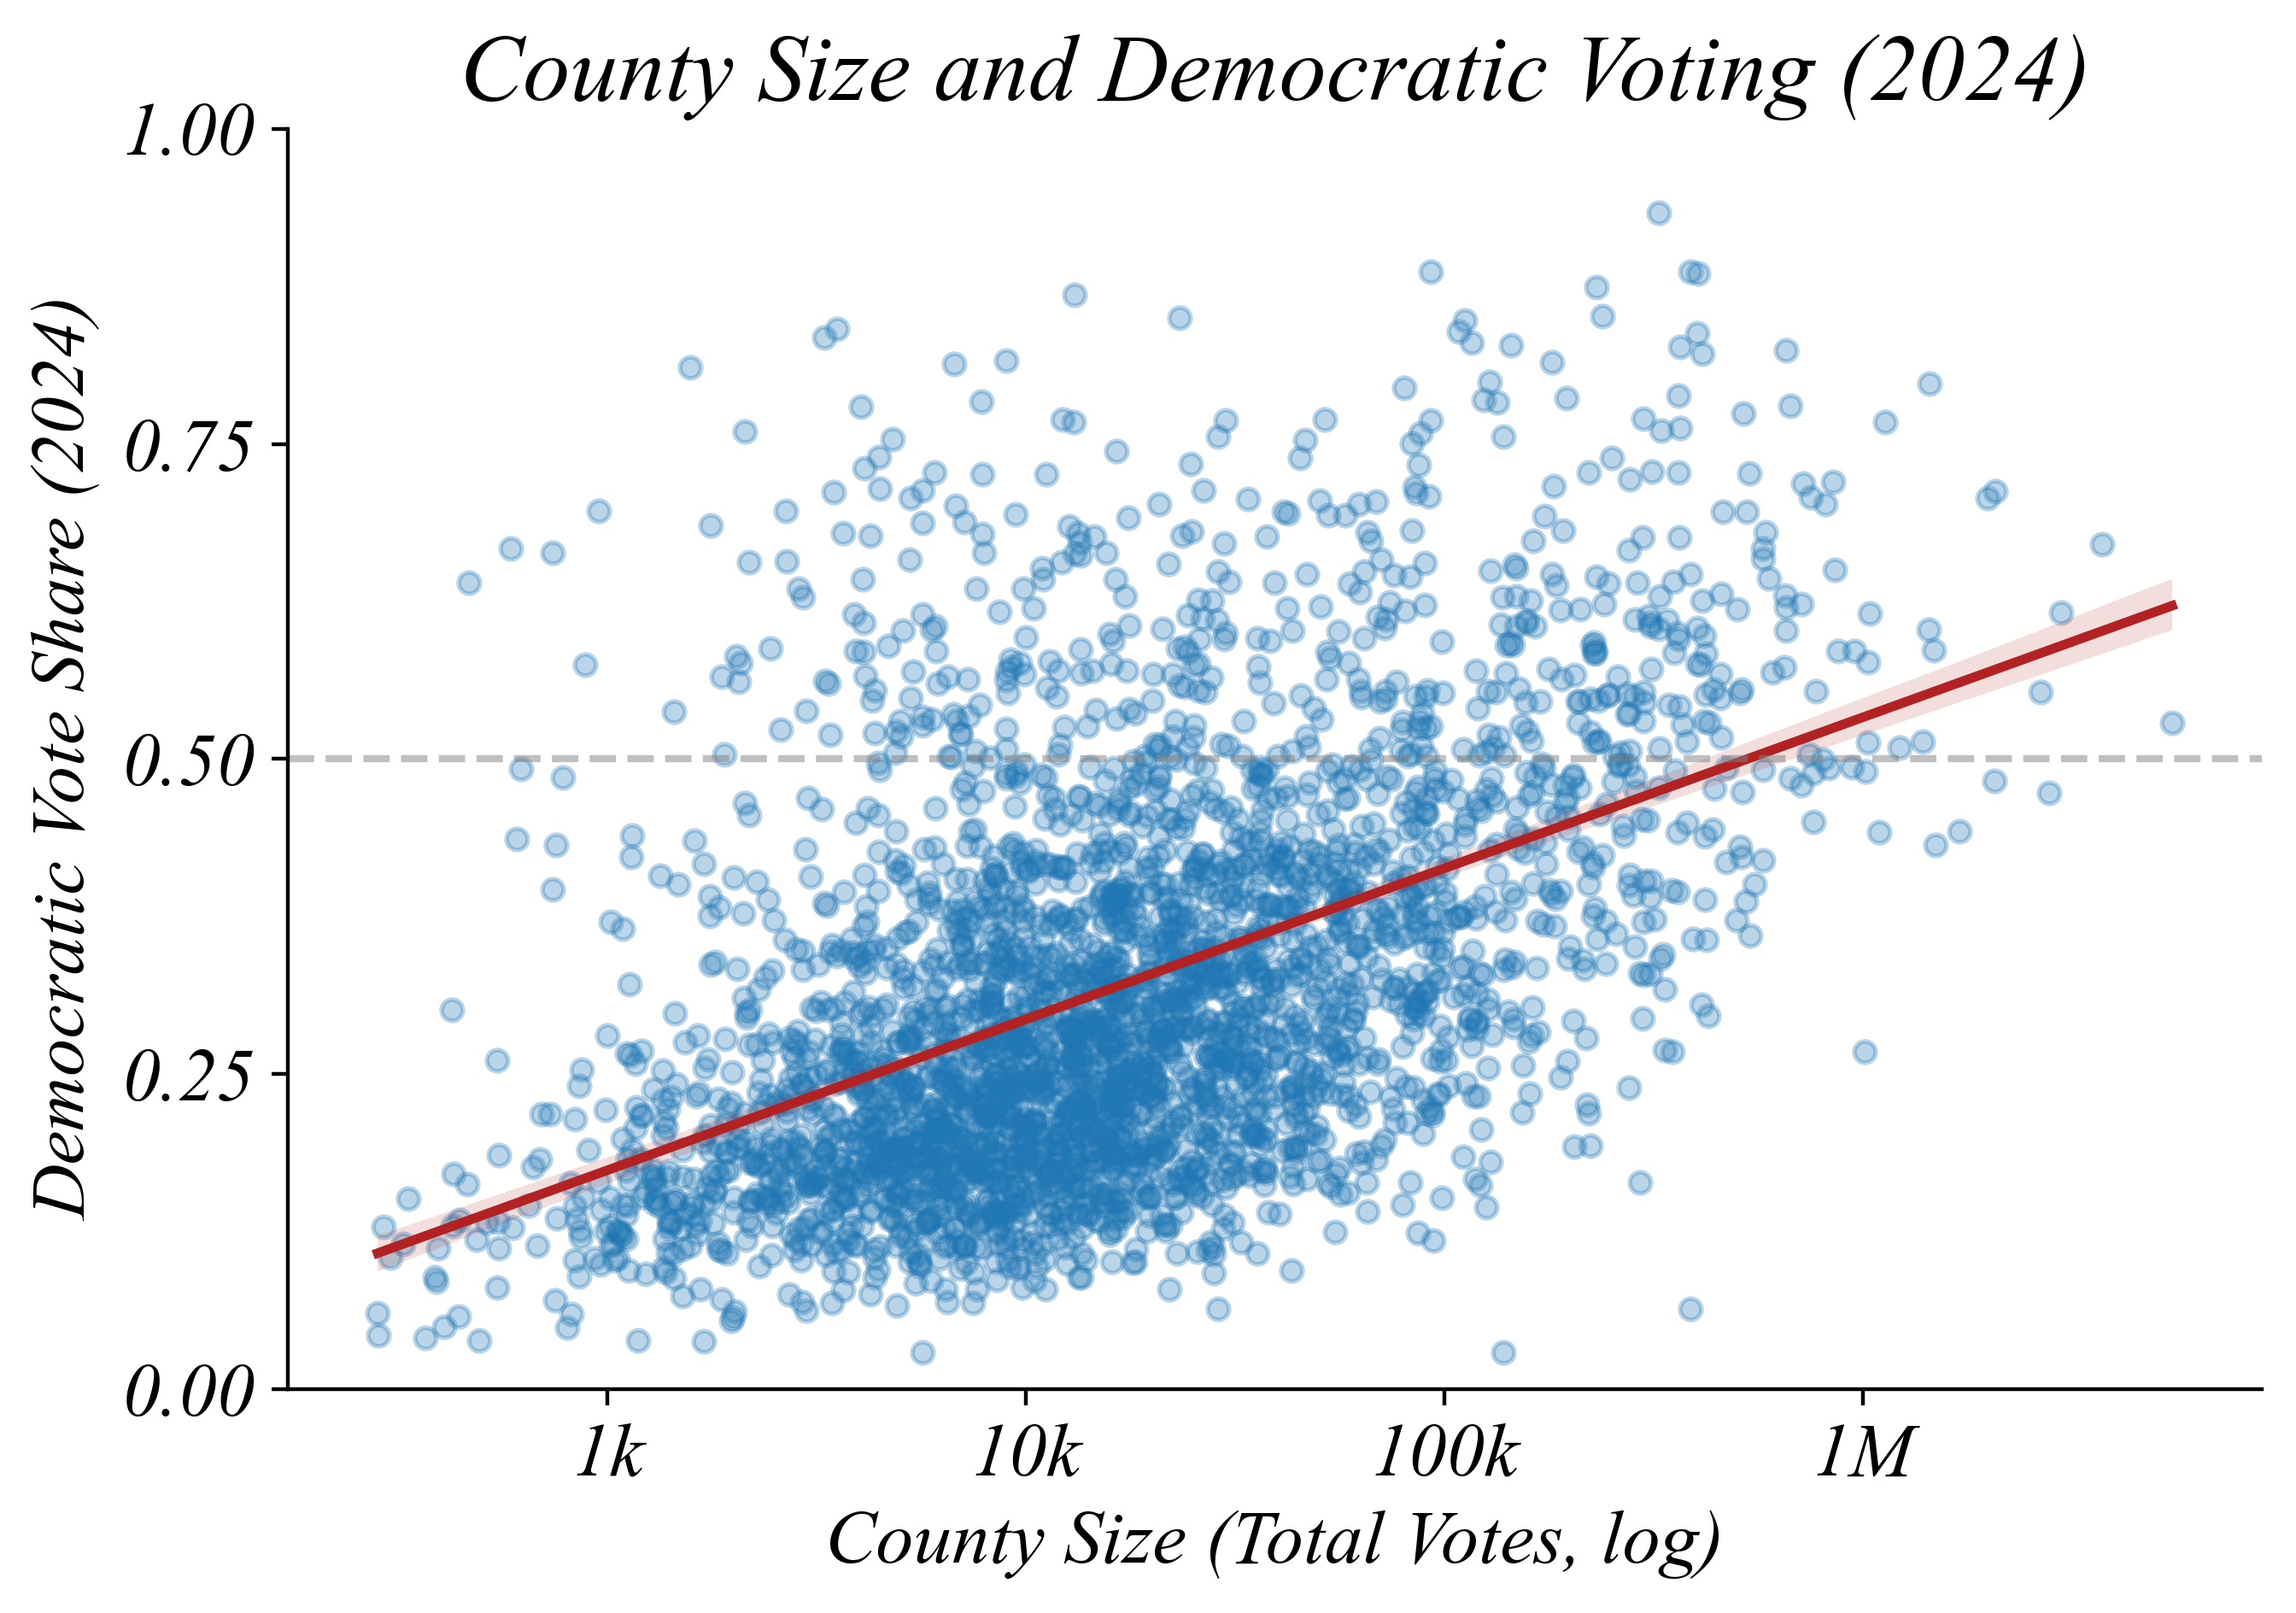

In [11]:
# Figure 2: Scatter of county size (total votes) vs dem share (2024)
g = sns.lmplot(data=data, x='log_votes', y='2024', 
               height=5, aspect=1.4,
               scatter_kws={'alpha': 0.3, 's': 20},
               line_kws={'color': 'firebrick', 'linewidth': 2})

# Styling
g.ax.set_xlabel('County Size (Total Votes, log)')
log_ticks = [np.log(1000), np.log(10000), np.log(100000), np.log(1000000)]
log_labels = ['1k', '10k', '100k', '1M']
g.ax.set_xticks(log_ticks)
g.ax.set_xticklabels(log_labels)

g.ax.set_ylabel('Democratic Vote Share (2024)')
g.ax.set_ylim(0, 1)
g.ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
g.ax.axhline(0.5, color='grey', linestyle='--', alpha=0.5)

g.ax.set_title('County Size and Democratic Voting (2024)')

plt.tight_layout()
plt.savefig('i/size_vs_dem_2024.png')
plt.show()

## Figure 3: Income vs Democratic Share (Q3)

In [ ]:
# Figure 3: Scatter of income vs dem share (2024)
g = sns.lmplot(data=data, x='log_income', y='2024', 
               height=5, aspect=1.4,
               scatter_kws={'alpha': 0.3, 's': 20},
               line_kws={'color': 'firebrick', 'linewidth': 2})

# Styling - consistent doubling ticks
g.ax.set_xlabel('Median Household Income (log scale)')
income_ticks = [25000, 50000, 100000, 200000]
g.ax.set_xticks([np.log(x) for x in income_ticks])
g.ax.set_xticklabels(['$25k', '$50k', '$100k', '$200k'])
g.ax.set_xlim(np.log(20000), np.log(250000))

g.ax.set_ylabel('Democratic Vote Share (2024)')
g.ax.set_ylim(0, 1)
g.ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
g.ax.axhline(0.5, color='grey', linestyle='--', alpha=0.5)

g.ax.set_title('Income and Democratic Voting (2024)')

plt.tight_layout()
plt.savefig('i/income_vs_dem_2024.png')
plt.show()

## Figure 4: Income vs Democratic Share by Year (Q4)

In [ ]:
# Figure 4: Scatter of income vs dem share, colored by year
from matplotlib.lines import Line2D

g = sns.lmplot(data=data_long, x='log_income', y='dem_share', hue='Year',
               hue_order=['2000', '2024'], palette=['C0', 'C1'],
               height=5, aspect=1.4,
               scatter_kws={'alpha': 0.3, 's': 20},
               line_kws={'linewidth': 3},
               legend=False)  # Disable default legend

# Styling - consistent doubling ticks
g.ax.set_xlabel('Median Household Income (log scale)')
income_ticks = [25000, 50000, 100000, 200000]
g.ax.set_xticks([np.log(x) for x in income_ticks])
g.ax.set_xticklabels(['$25k', '$50k', '$100k', '$200k'])
g.ax.set_xlim(np.log(20000), np.log(250000))

g.ax.set_ylabel('Democratic Vote Share')
g.ax.set_ylim(0, 1)
g.ax.set_yticks([0, 0.25, 0.5, 0.75, 1.0])
g.ax.axhline(0.5, color='grey', linestyle='--', alpha=0.5)

g.ax.set_title('Income and Democratic Voting: 2000 vs 2024')

# Custom legend in upper right with box
legend_elements = [Line2D([0], [0], color='C0', linewidth=3, label='2000'),
                   Line2D([0], [0], color='C1', linewidth=3, label='2024')]
g.ax.legend(handles=legend_elements, loc='upper right', frameon=True,
            fancybox=True, edgecolor='black', facecolor='white', framealpha=1)

plt.tight_layout()
plt.savefig('i/income_vs_dem_by_year.png')
plt.show()

## Summary Statistics

In [ ]:
# Democratic share by year summary
print("Democratic Share by Year:")
print(data_long.groupby('Year')['dem_share'].agg(['mean', 'median', 'std', 'count']).round(3))

In [ ]:
# Correlation between log income and dem share by year
print("\nCorrelation between Log Income and Democratic Share:")
for year in ['2000', '2024']:
    year_data = data_long[data_long['Year'] == year]
    corr = year_data['log_income'].corr(year_data['dem_share'])
    print(f"{year}: {corr:.3f}")